## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\percy\anaconda3\envs\te

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 1s 22us/step - loss: 2.1807 - accuracy: 0.1598 - val_loss: 2.1279 - val_accuracy: 0.1707
Epoch 50/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.1706 - accuracy: 0.1596 - val_loss: 2.2196 - val_accuracy: 0.1387
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

50000/50000 [==============================] - 1s 22us/step - loss: 0.6462 - accuracy: 0.7668 - val_loss: 1.6751 - val_accuracy: 0.5260
Epoch 48/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.6550 - accuracy: 0.7631 - val_loss: 1.7013 - val_accuracy: 0.5213
Epoch 49/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.6102 - accuracy: 0.7783 - val_loss: 1.7590 - val_accuracy: 0.5159
Epoch 50/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.6164 - accuracy: 0.7776 - val_loss: 1.7992 - val_accuracy: 0.5128
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

Epoch 45/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.0166 - accuracy: 0.6423 - val_loss: 1.3231 - val_accuracy: 0.5346
Epoch 46/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.0036 - accuracy: 0.6453 - val_loss: 1.3464 - val_accuracy: 0.5296
Epoch 47/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.9831 - accuracy: 0.6519 - val_loss: 1.3352 - val_accuracy: 0.5365
Epoch 48/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.9731 - accuracy: 0.6580 - val_loss: 1.3199 - val_accuracy: 0.5458
Epoch 49/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.9676 - accuracy: 0.6566 - val_loss: 1.3520 - val_accuracy: 0.5332
Epoch 50/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.9584 - accuracy: 0.6612 - val_loss: 1.3523 - val_accuracy: 0.5284
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 1s 22us/step - loss: 1.5751 - accuracy: 0.4507 - val_loss: 1.5875 - val_accuracy: 0.4438
Epoch 44/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.5709 - accuracy: 0.4531 - val_loss: 1.5853 - val_accuracy: 0.4417
Epoch 45/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.5662 - accuracy: 0.4540 - val_loss: 1.5828 - val_accuracy: 0.4439
Epoch 46/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.5620 - accuracy: 0.4551 - val_loss: 1.5774 - val_accuracy: 0.4487
Epoch 47/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.5573 - accuracy: 0.4579 - val_loss: 1.5740 - val_accuracy: 0.4500
Epoch 48/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.5529 - accuracy: 0.4592 - val_loss: 1.5720 - val_accuracy: 0.4478
Epoch 49/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.5489 - accuracy: 0.4605 - val_loss: 1.5671

Epoch 41/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9742 - accuracy: 0.3132 - val_loss: 1.9726 - val_accuracy: 0.3165
Epoch 42/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9701 - accuracy: 0.3144 - val_loss: 1.9687 - val_accuracy: 0.3173
Epoch 43/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.9662 - accuracy: 0.3164 - val_loss: 1.9648 - val_accuracy: 0.3174
Epoch 44/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9624 - accuracy: 0.3174 - val_loss: 1.9611 - val_accuracy: 0.3177
Epoch 45/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.9586 - accuracy: 0.3186 - val_loss: 1.9574 - val_accuracy: 0.3200
Epoch 46/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.9549 - accuracy: 0.3197 - val_loss: 1.9539 - val_accuracy: 0.3208
Epoch 47/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9513 - accuracy: 0.3205 - val_

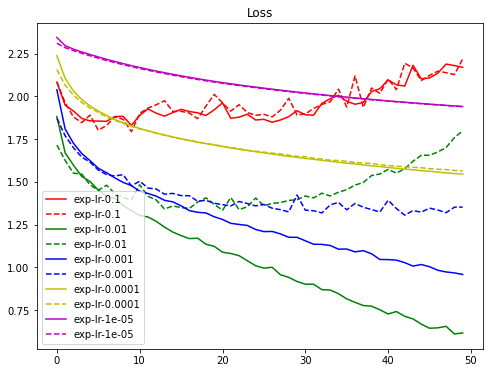

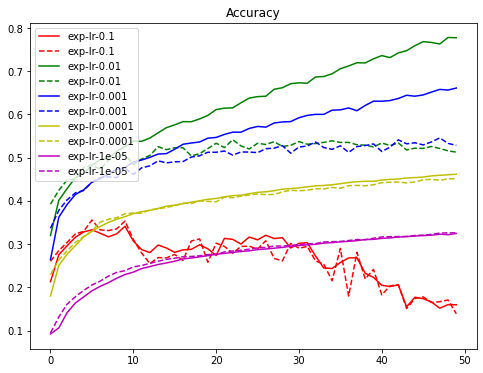

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()